In [55]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import scanpy as sc 
import csv
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

#### Variables

In [2]:
file_path = 'C:/Users/morts/Documents/TAU/Manifold_Project/Data/SPECIFIC_PAPERS/Serrano_Ravel2013_Ravel2011/IVC0_PCA_20_20_29012023/'

file_name = file_path + 'ps_res_29012023.xlsx'

sheet_abun = 'abundance'
sheet_meta = 'meta'
sheet_umap = 'umap'
sheet_pcoa = 'pcoa'

#### Load data

In [3]:
meta = pd.read_excel(file_name, sheet_name = sheet_meta, index_col = 0)
temp_meta = meta.loc[~ meta['time'].isnull()]
temp_meta['menst'] = np.where(temp_meta['menst'] >= 1 , 1, 0)
print('Temporal samples shape: ' + str(temp_meta.shape))

Temporal samples shape: (3126, 26)


#### Autocorrelation

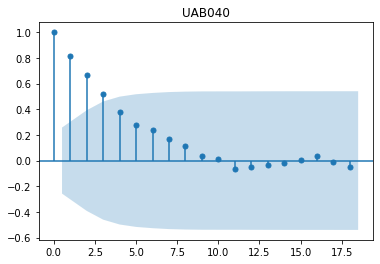

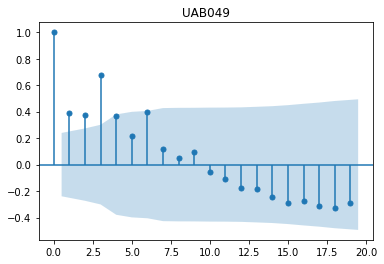

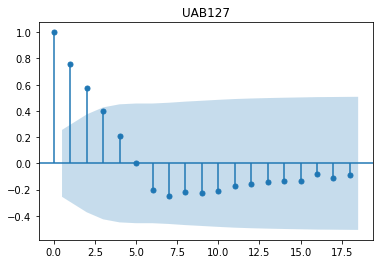

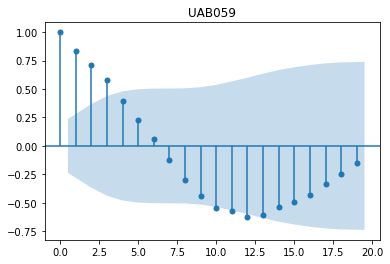

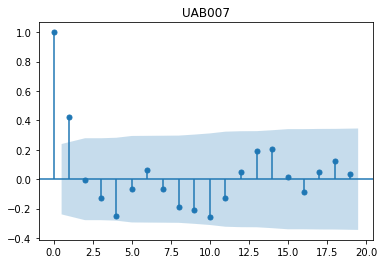

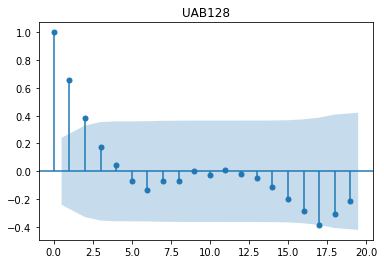

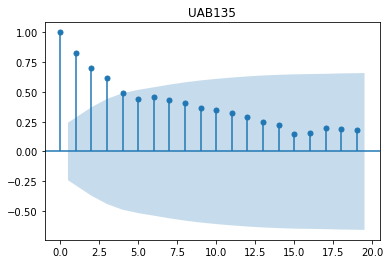

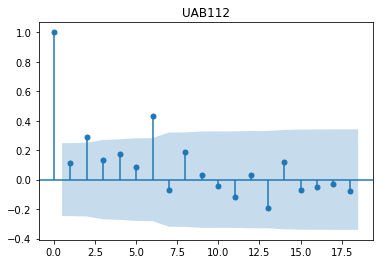

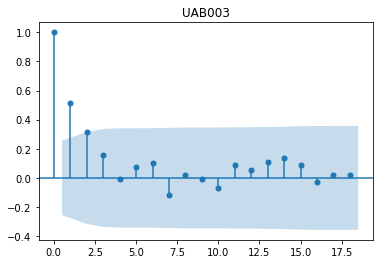

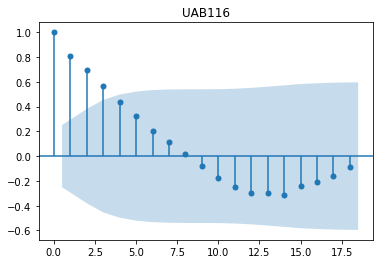

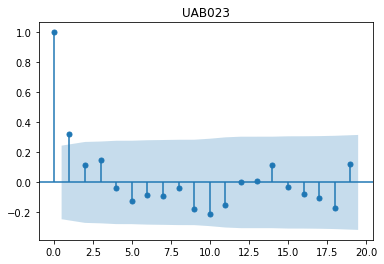

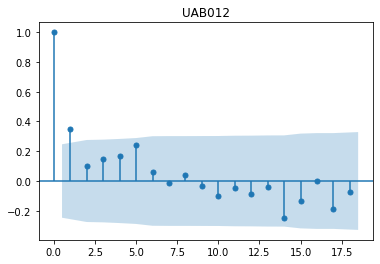

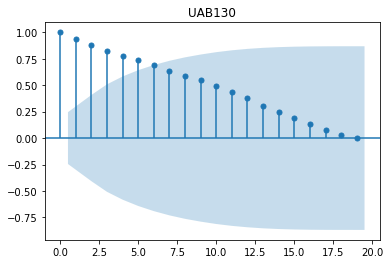

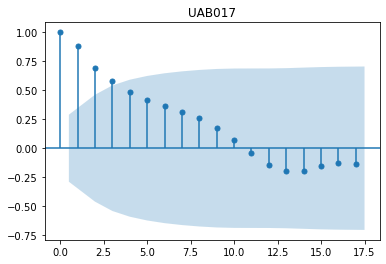

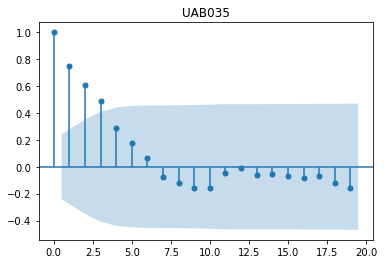

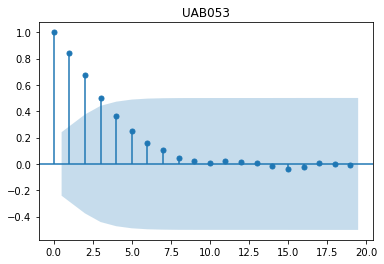

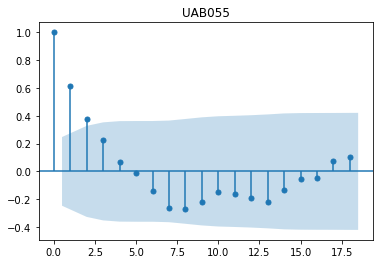

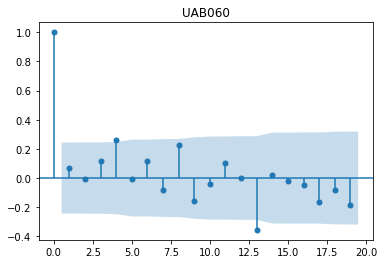

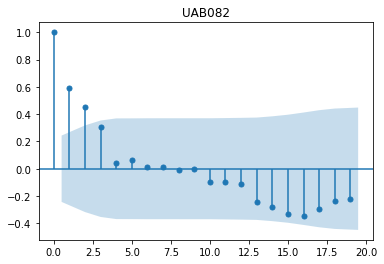

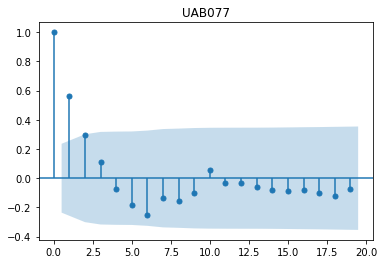

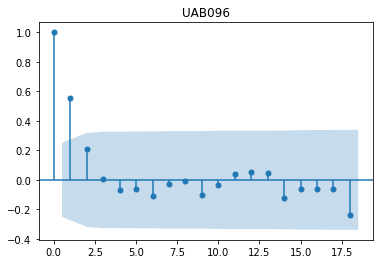

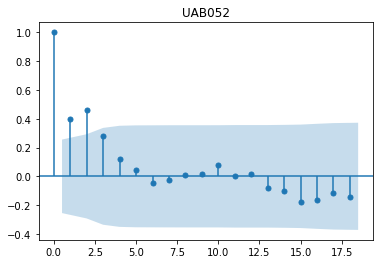

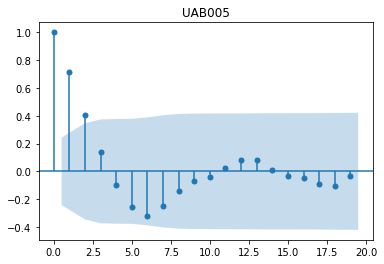

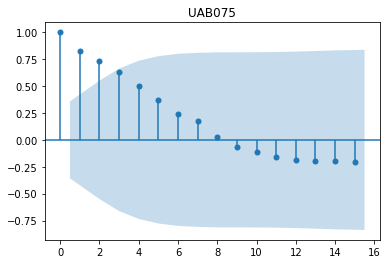

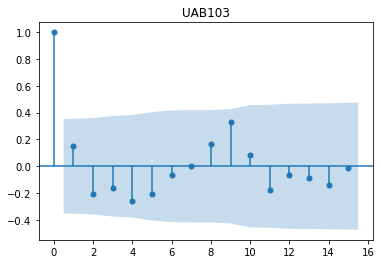

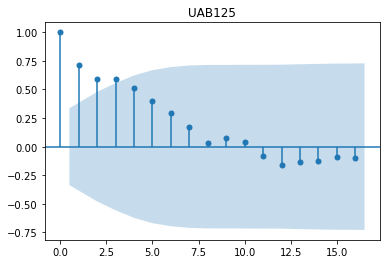

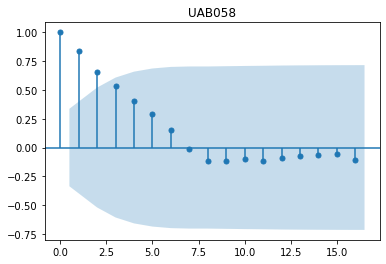

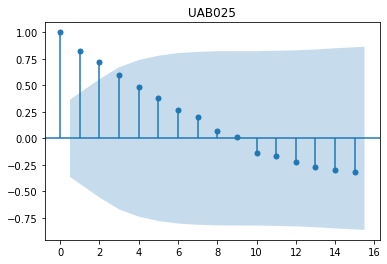

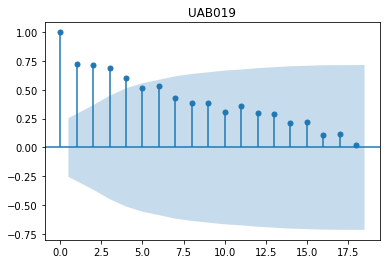

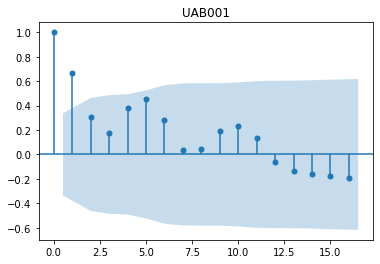

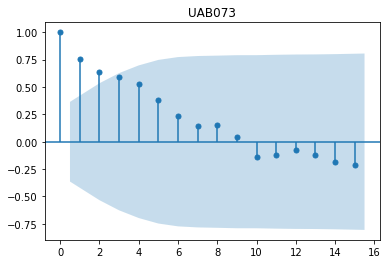

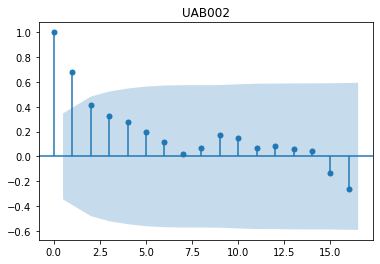

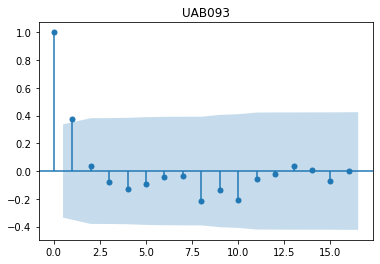

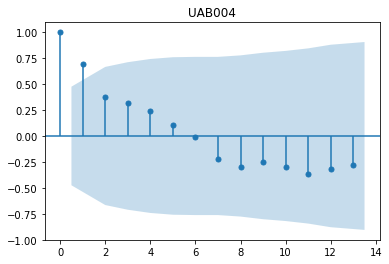

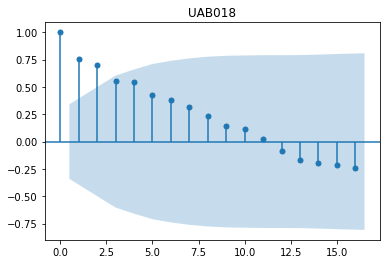

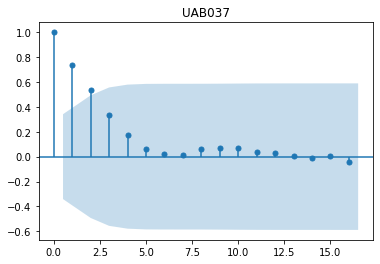

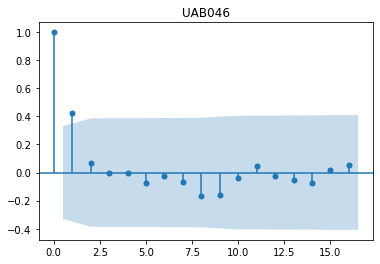

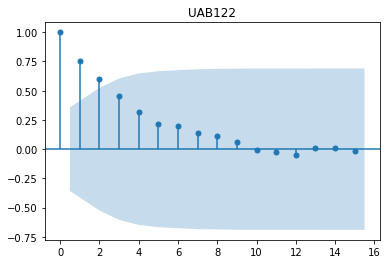

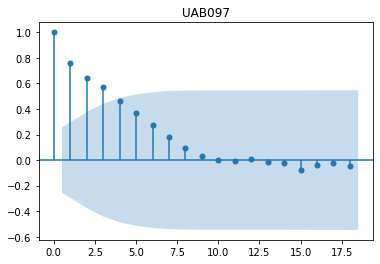

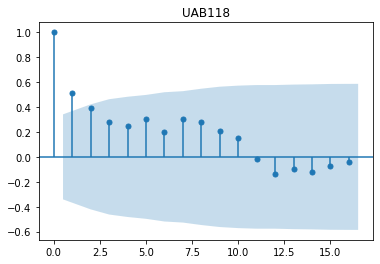

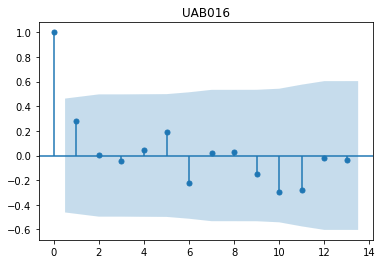

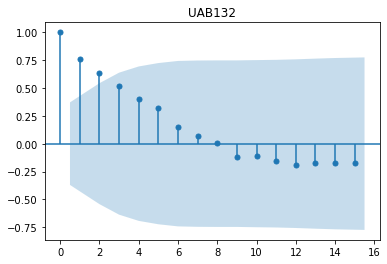

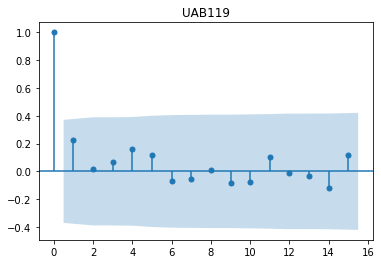

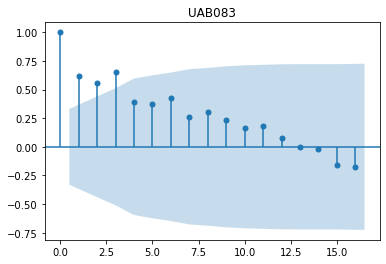

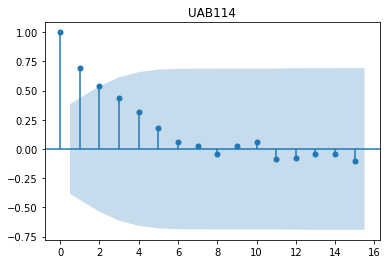

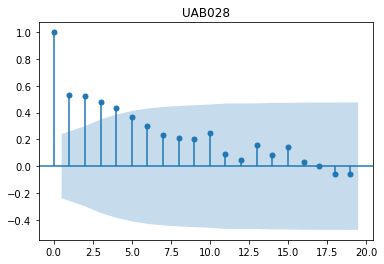

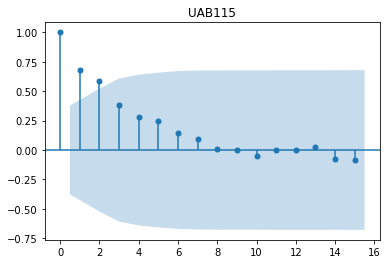

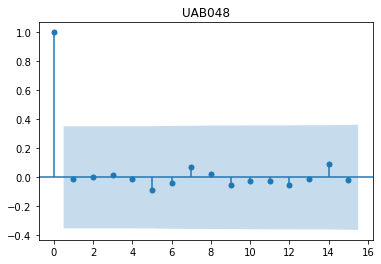

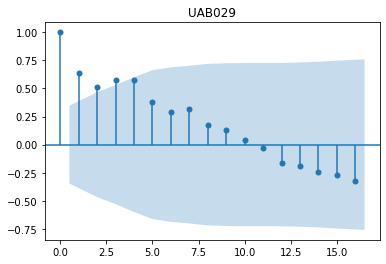

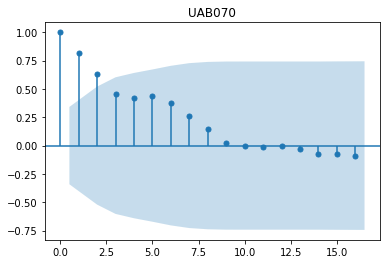

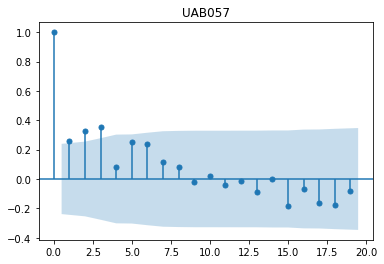

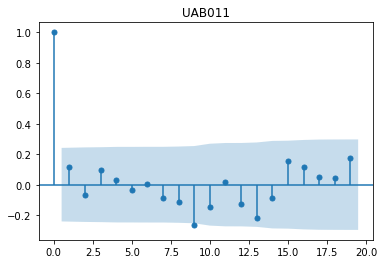

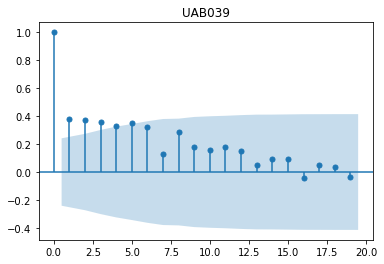

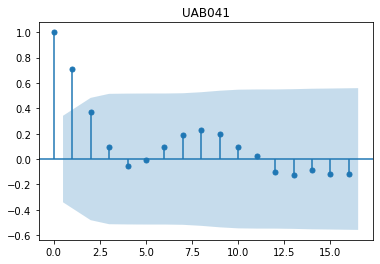

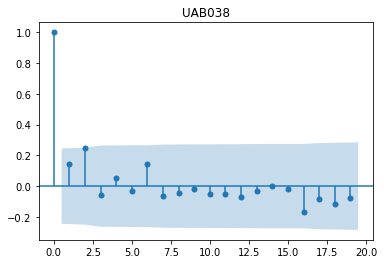

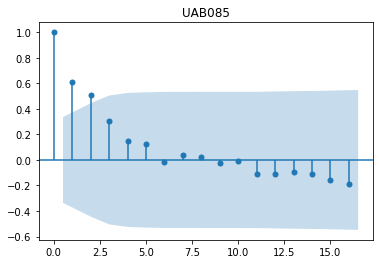

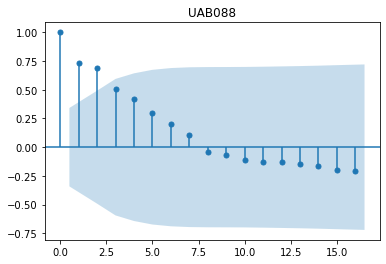

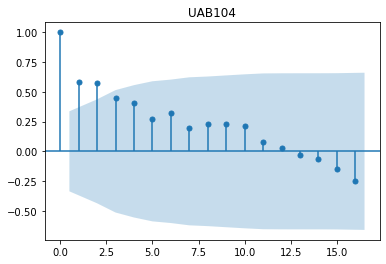

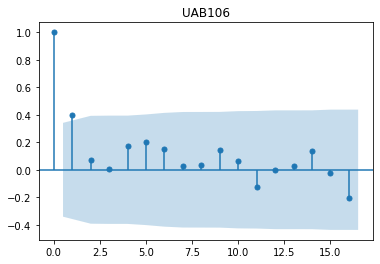

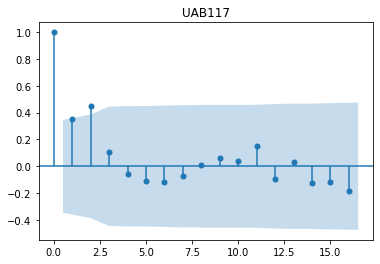

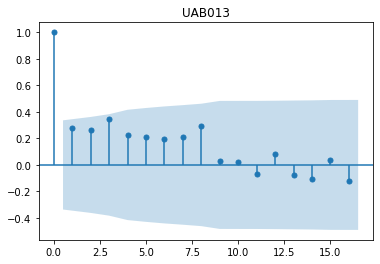

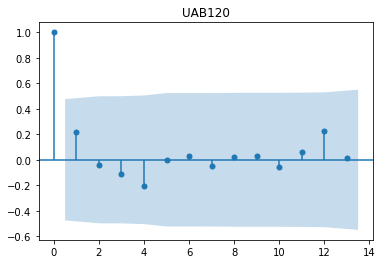

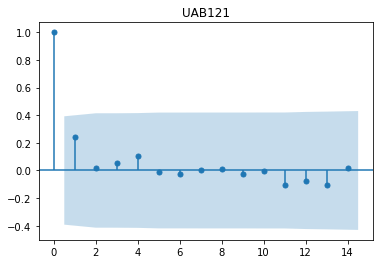

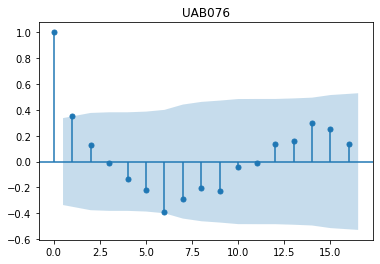

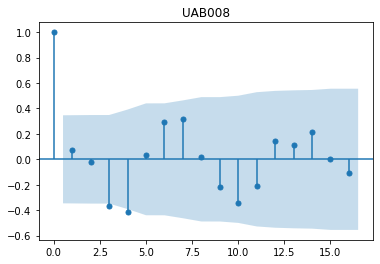

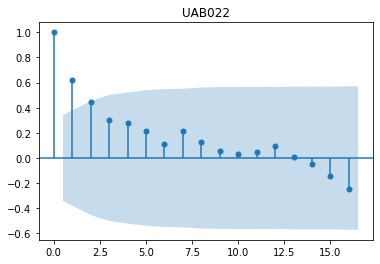

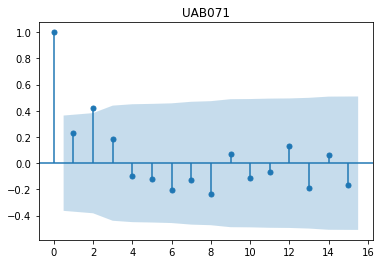

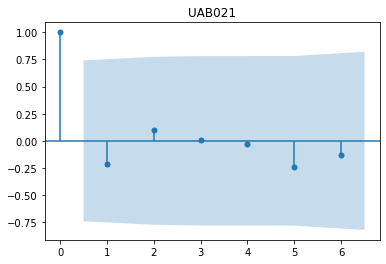

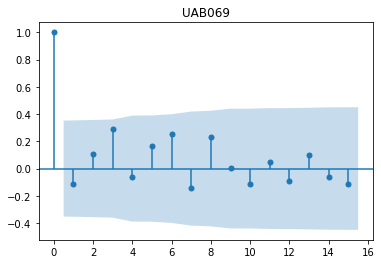

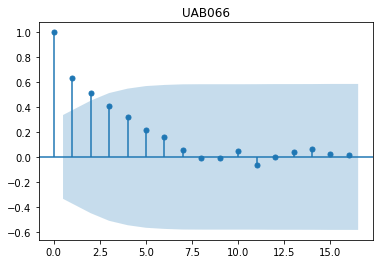

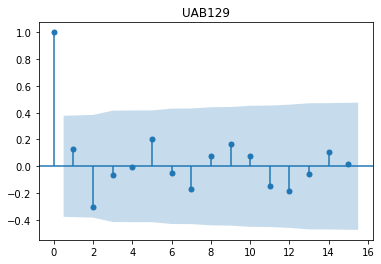

In [18]:
for subject in temp_meta.subjectID.unique():
    series = temp_meta[temp_meta['subjectID'] == subject].mt_pseudotime
    plot_acf(series, title = subject)
    plt.show()

#### ADF

In [53]:
adf_dict = {}
for subject in temp_meta.subjectID.unique():
    series = temp_meta[temp_meta['subjectID'] == subject].mt_pseudotime
    adf = adfuller(series)
    adf_dict[subject] = adf[1]

In [54]:
for key, value in adf_dict.items():
    if value <= 0.05:
        print(key, value)

UAB059 0.002351901417710446
UAB007 5.597728913015272e-06
UAB128 0.006852473660132199
UAB023 9.947526406810093e-07
UAB012 3.514572333482564e-06
UAB035 0.03311121785781614
UAB082 0.002332932997085832
UAB077 0.00030374950388252546
UAB096 0.0012133844791040313
UAB052 0.04461743289133733
UAB005 0.02873887636282007
UAB103 0.0034989877882360652
UAB046 0.007069268765118904
UAB119 3.471420942724796e-08
UAB048 0.043385462077133834
UAB011 5.836691032510671e-10
UAB038 0.0007295586589452257
UAB106 0.0021810879725134304
UAB120 0.04785511972316626
UAB121 0.005254858253027224
UAB076 0.014986174515061242
UAB008 2.3379991937869677e-05
UAB022 0.036545244057846434
UAB129 0.00035956844045809664


#### Seasonal decompose

In [68]:
p1 = seasonal_decompose(temp_meta[temp_meta['subjectID'] == 'UAB059'].mt_pseudotime, freq = 15)

In [69]:
p2 = seasonal_decompose(temp_meta[temp_meta['subjectID'] == 'UAB104'].mt_pseudotime, freq = 15)

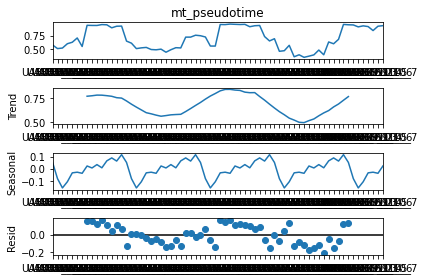

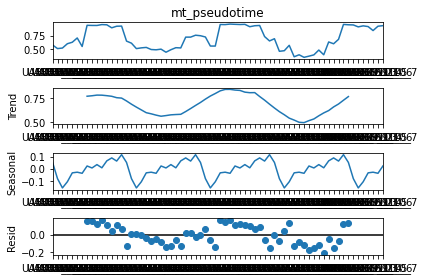

In [71]:
p1.plot()

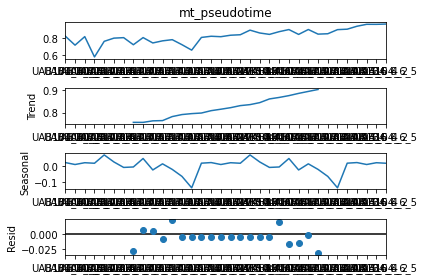

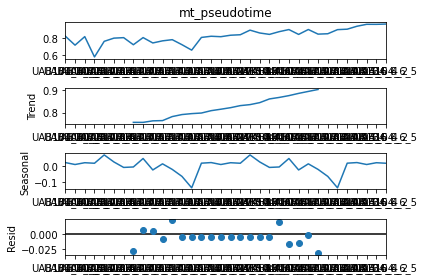

In [70]:
p2.plot()